<a href="https://colab.research.google.com/github/gaurangdave/mnist_digits_recognition/blob/main/notebooks/02_transform_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Transformation & Training

* In this notebook, we'll focus on creating a pipeline for data transformation and then use the pipeline to train and evaluate multiple classification models.

## Import Libraries

In [42]:
from sklearn.preprocessing import Binarizer, OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.dummy import DummyClassifier

from google.colab import drive
from google.colab import userdata

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


## Read Data

### Mount Google Drive

In [2]:
## mount google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Retrieve the Google Drive path stored in secrets
shared_folder_path = userdata.get("SHARED_DRIVE_PATH")

### Access Train/Test Data

In [4]:
## access train data
mnist_train_set_path = f"{shared_folder_path}/mnist_train_set.csv"
mnist_train_set = pd.read_csv(mnist_train_set_path)

## access test data
mnist_test_set_path = f"{shared_folder_path}/mnist_test_set.csv"
mnist_test_set = pd.read_csv(mnist_test_set_path)

In [5]:
mnist_train_set.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
mnist_test_set.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### Split Features/Target Dataset

In [7]:
## Split training features and target into separate dataset
train_X = mnist_train_set.drop("class", axis=1)
train_Y = mnist_train_set["class"]

## split test features and target into separate dataset
test_X = mnist_test_set.drop("class", axis=1)
test_Y = mnist_test_set["class"]

In [8]:
train_X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 335.0 MB


In [10]:
train_Y.head()

,class
0,0
1,7
2,0
3,9
4,1


In [11]:
train_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 56000 entries, 0 to 55999
Series name: class
Non-Null Count  Dtype
--------------  -----
56000 non-null  int64
dtypes: int64(1)
memory usage: 437.6 KB


In [12]:
test_X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 83.7 MB


In [14]:
test_Y.head()

,class
0,7
1,3
2,1
3,1
4,2


In [15]:
test_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14000 entries, 0 to 13999
Series name: class
Non-Null Count  Dtype
--------------  -----
14000 non-null  int64
dtypes: int64(1)
memory usage: 109.5 KB


## Data Transformation

* Based on `Data Exploration` done in [01_explore_data.ipynb](https://github.com/gaurangdave/mnist_digits_recognition/blob/main/notebooks/01_explore_data.ipynb) below is the outline of the pipeline we are going to create,
  * Pipeline Parameters
    * `method` - To indicate whether we are going to `normalize`, `binarize` or leave the data as it is `none`.
    * `threshold` - only applicable to `binarize` option to help set the threshold for binarization.

### Preprocessing Function

In [16]:
def preprocess_data(data, method="none", threshold = 128):
    """
    Preprocess MNIST data based on the specified method.

    Args:
        data (pd.DataFrame): Input dataset with only features.
        method (str): Preprocessing method - "normalize", "binarize", or "none".

    Returns:
        pd.DataFrame: Preprocessed dataset.
    """
    if method == "normalize":
        scaler = MinMaxScaler()
        transformed_data = scaler.fit_transform(data)
        return pd.DataFrame(transformed_data)
    elif method == "binarize":
        binarizer = Binarizer(threshold=threshold)
        transformed_data = binarizer.fit_transform(data)
        return pd.DataFrame(transformed_data)
    # else, keep features unchanged (no transformation)

    # Combine processed features and labels
    return pd.DataFrame(data)

* Lets create a `FunctionalTransformer` and test the pipeline

In [17]:
## helper function to print aggregated descrition of features
def print_aggregated_description(data):
  # Check the range of normalized pixel values
  print(f"Min of mins in data is {data.iloc[:, :].min().min()} and max of mins in data is {data.iloc[:, :].min().max()}")
  print(f"Min of max in data is {data.iloc[:, :].max().min()} and max of max in data is {data.iloc[:, :].max().max()}")

  # # Check the mean and standard deviation
  print(f"Aggregated mean of data is {data.iloc[:, :].mean().mean()}")
  print(f"Aggregated standard deviation of data is {data.iloc[:, :].std().mean()}")


In [18]:
preprocess_transformer = FunctionTransformer(preprocess_data, feature_names_out="one-to-one")


In [19]:
## this should output the dataframe as it is without any changes.
preprocessed_data = pd.DataFrame(preprocess_transformer.fit_transform(train_X, y=None), columns=preprocess_transformer.get_feature_names_out())
print_aggregated_description(preprocessed_data)

Min of mins in data is 0 and max of mins in data is 0
Min of max in data is 0 and max of max in data is 255
Aggregated mean of data is 33.40283570973032
Aggregated standard deviation of data is 49.25044784975305


Observation:
* Here aggregated min is 0 and max is 255 which matches the raw data as expected and aggreagated mean and standard deviation also matches the raw data as expected

In [20]:
## this should normalized the dataframe.
preprocess_transformer = FunctionTransformer(preprocess_data, kw_args={"method": "normalize"}, feature_names_out="one-to-one")
preprocessed_data = pd.DataFrame(preprocess_transformer.fit_transform(train_X), columns=preprocess_transformer.get_feature_names_out())
print_aggregated_description(preprocessed_data)

Min of mins in data is 0.0 and max of mins in data is 0.0
Min of max in data is 0.0 and max of max in data is 1.0
Aggregated mean of data is 0.13099372795196987
Aggregated standard deviation of data is 0.19343918583584427


In [21]:
## this should binarize the dataframe.
preprocess_transformer = FunctionTransformer(preprocess_data, kw_args={"method": "binarize", "threshold": 128}, feature_names_out="one-to-one")
preprocessed_data = pd.DataFrame(preprocess_transformer.fit_transform(train_X), columns=preprocess_transformer.get_feature_names_out())
print_aggregated_description(preprocessed_data)

Min of mins in data is 0 and max of mins in data is 0
Min of max in data is 0 and max of max in data is 1
Aggregated mean of data is 0.13101193513119536
Aggregated standard deviation of data is 0.21739390727945354


## Plan

* As a learning experience, we've decided to explore the following ML Algorithms to explore for classification,
  1. Logistic Regression.
  1. Support Vector Classifier (SVC).
  1. K-Nearest Neighbour.
  1. Random Forest Classifier.
* We'll use the following metrics for each model,
  * Accuracy
  * Weighted F1 Score
  * Per-class F1 Score
* For `Logistic Regression` and `SVC` we'll focus on `hyperparameter tuning` and `threshold tuning` to get the best results.
* For `KNN` and `Random Forest Classifier` we'll just focus on `hyperparameter tuning` to reduce the complexity and focus on getting handson experience with what we've learnt so far.

## Baseline Model

* Lets create models using `DummyClassifier` with stratified and most frequest strategies to create a baseline for comparison

### Stratified Classifier

In [44]:
# Create a dummy classifier that predicts randomly based on class distribution
dummy_stratified = DummyClassifier(strategy="stratified", random_state=42)
dummy_stratified.fit(train_X, train_Y)

# Predict and evaluate
stratified_predictions = dummy_stratified.predict(test_X)
stratified_accuracy = accuracy_score(test_Y, stratified_predictions)
stratified_f1 = f1_score(test_Y, stratified_predictions, average="weighted")
print(f"Stratified Prediction - Accuracy: {stratified_accuracy:.4f}")
print(f"Weighted F1: {stratified_f1:.4f}")

Stratified Prediction - Accuracy: 0.0988
Weighted F1: 0.0988


### Most Frequest Classifier

In [45]:
# Create a dummy classifier that predicts the most frequent class
dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_most_frequent.fit(train_X, train_Y)

# Predict and evaluate
most_frequent_predictions = dummy_most_frequent.predict(test_X)
most_frequent_accuracy = accuracy_score(test_Y, most_frequent_predictions)
most_frequent_f1 = f1_score(test_Y, most_frequent_predictions, average="weighted")
print(f"Most Frequent Class - Accuracy: {most_frequent_accuracy:.4f}")
print(f"Weighted F1: {most_frequent_f1:.4f}")

Most Frequent Class - Accuracy: 0.1125
Weighted F1: 0.0228


### Summary

In [47]:
baseline_results = pd.DataFrame({
    "Model": ["Most Frequent", "Stratified"],
    "Accuracy": [most_frequent_accuracy, stratified_accuracy],
    "Weighted F1": [most_frequent_f1, stratified_f1]
})

baseline_results

,Model,Accuracy,Weighted F1
0,Most Frequent,0.112500,0.022753
1,Stratified,0.098786,0.098806


### Observations
* Both baseline models have very low `F1 Score` and `Accuracy` as expected.
* Since the train and test set were stratified, the frequency of classes in both the sets are more or less similar which explains why the accuracy of `Frequent Dummy Classifier` is more than `Stratified`.

## Model Exploration

* As a learning experience, I've decided to explore the following ML Algorithms to explore for classification,
  * Logistic Regression
  * Support Vector Classifier (SVC)
  * K-Nearest Neighbour
  * Random Forest Classifier.
* We'll try these models and experiment with different transformation options and hyperparams and try and find the best model.
* But first we'll create a simple model and try different analysis to reinforce our understanding

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

## initialize LogisticRegression
logistic_regression = LogisticRegression(max_iter=10000)

## create pipeline
pipeline = Pipeline([
    ("preprocessing", FunctionTransformer(preprocess_data, kw_args={"method": "normalize"})),
    ("training", logistic_regression)
])

In [23]:
## lets first train a default version and see its performance.
# model = pipeline.fit(train_X, train_Y)

# predictions = model.predict()

scores = cross_val_score(pipeline, train_X, train_Y, cv=3, scoring="accuracy")

Observations:
* The default model as it is not able to converge, it could be because the data is not normalized.

In [24]:
scores

array([0.91953715, 0.91921573, 0.9208186 ])

* Was able to train the model and get accuracy score only after using normalized data, so I think that is important, and we might have to experiment between normalized and binarized data only.
* Lets try creating Confusion Matrix for visualization

#### Finding Probabilies

In [25]:
probabilities = cross_val_predict(pipeline, train_X, train_Y, cv=3, method="predict_proba")

In [26]:
probabilities

array([[9.98707959e-01, 1.49557354e-17, 2.59762460e-08, ...,
        1.01984918e-10, 1.01682331e-09, 1.76158228e-11],
       [3.40989406e-11, 8.37320398e-05, 3.28817715e-06, ...,
        9.96414161e-01, 7.47371692e-04, 2.64254126e-03],
       [9.99205463e-01, 6.83857203e-12, 3.13024072e-05, ...,
        3.00017943e-06, 4.60840757e-05, 3.06765519e-04],
       ...,
       [1.14550709e-10, 9.94946123e-01, 6.25343533e-05, ...,
        4.54128967e-06, 2.30778798e-03, 2.52228329e-04],
       [2.53227231e-08, 1.33695843e-08, 3.56465739e-05, ...,
        1.49089159e-03, 4.45086189e-03, 9.78397015e-01],
       [1.03342244e-07, 2.60385328e-06, 4.93467236e-05, ...,
        2.68431619e-01, 1.95409730e-03, 6.54151037e-02]])

In [27]:
## convert probabilies into predictions
predictions = np.argmax(probabilities, axis=1)

In [28]:
predictions

array([0, 7, 0, ..., 1, 9, 4])

#### ROC Score

In [39]:
roc_auc_score(train_Y, probabilities, multi_class="ovr")

0.992883915425284

F1 Score

In [40]:
f1_score(train_Y, predictions, average="weighted")

0.9197076517400227

#### Confusion Matrix

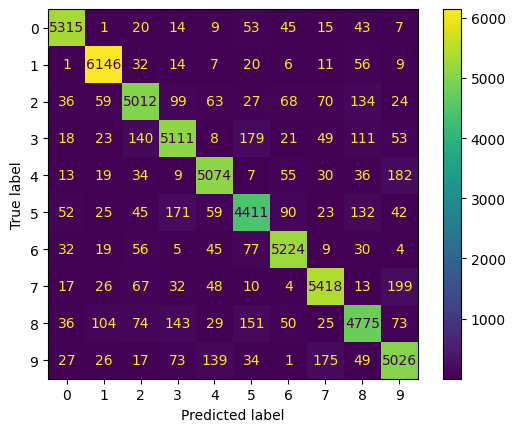

In [29]:
ConfusionMatrixDisplay.from_predictions(train_Y, predictions)

* Lets look at normalized data in percentage to get more useful insight

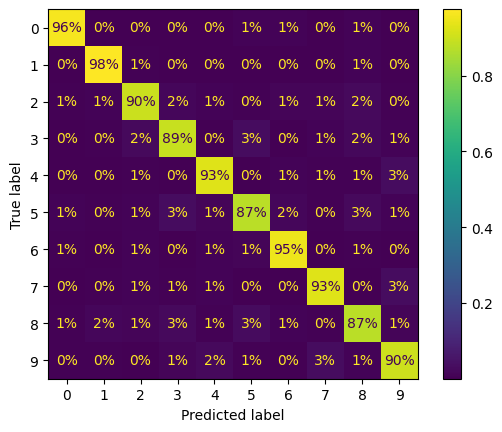

In [30]:
ConfusionMatrixDisplay.from_predictions(train_Y, predictions, normalize="true", values_format=".0%")

Observations:
* So the percent of predictions for `3`, `5` and `8` are significantly less than rest of the classes.
* Which is interesting because when it comes to hand written digits, `3`, `5` and `8` are similar and can be confusing depending on the handwriting.
* Lets look at the F1 score for the preditions